# Module 2 - Decision Trees

In this module we explore especifically the Decision Tree. By the end of this module, you should be able to:

* Understand how a decision tree works for classification
* Use the main python libraries to build decision trees and random forests 

## What is a Decision Tree?

Decision trees are one of the most popular and powerful algorithms for classification tasks. The general idea of decision trees is to divide the data into "pure regions", this means, subsets of the data with only one class. The decision tree accomplishes this by finding the relevant features that help to establish the decision boundaries that separates the data into purer regions. The order in how the decision tree works can be described in the following way:
1. The algorithm starts in a **root node** where the full training sample is taken.
2. In the root node, the model will try to find the feature that best divides the data into purer regions. 
3. Once the best feature is found, the model will generate N subsets and split the data.
4. Each subset can be assigned to either a **new decision node** where the process is recursively repeated with the subset, or a **leaf node**, where the subset is as pure as possible and a class label is assigned. 

You can find more information regarding the theorical aspects of a decision tree in the following [link](https://www.geeksforgeeks.org/decision-tree/).

In [31]:
# Load our packages

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data

To train our decision tree, we will use the final_grades dataset. In this dataset, we are exploring the academic performance of secondary education students of two Portuguese schools. You can find more details about this dataset in the following [link](https://archive.ics.uci.edu/dataset/320/student+performance). 

In [2]:
# We load our data
df = pd.read_csv("datasets/final_grades.csv")
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,0,0,0,18,1,0,0,4,4,0,...,3,4,1,1,3,6,5,6,6,F
1,1,0,0,17,1,0,1,1,1,0,...,3,3,1,1,3,4,5,5,6,F
2,2,0,0,15,1,1,1,1,1,0,...,3,2,2,3,3,10,7,8,10,E
3,3,0,0,15,1,0,1,4,2,1,...,2,2,1,1,5,2,15,14,15,B
4,4,0,0,16,1,0,1,3,3,2,...,3,2,1,2,5,4,6,10,10,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,1,1,20,1,1,0,2,2,3,...,5,4,4,5,4,11,9,9,9,F
391,391,1,1,17,1,1,1,3,1,3,...,4,5,3,4,2,3,14,16,16,B
392,392,1,1,21,0,0,1,1,1,2,...,5,3,3,3,3,3,10,8,7,F
393,393,1,1,18,0,1,1,3,2,3,...,4,1,3,4,5,0,11,12,10,E


As we see, this dataset contains multiple features for each student, as well as the final grade. Our goal is gonna be to predict the final grade for each student based on the set of features.

**Important notes on the data:** 
- We are going to remove the column G3 from our training data, as this is a numeric representation of the final grade (the target label). Keeping this feature would be equivalent to provide the answer to the model, and our training would make no sense.
- G1 and G2 represent 1st and 2nd period grades, previous to the final grade. These 2 feature are therefore highly correlated to the final grade, and therefore the most likely to help us predict it. As the source of the data suggests, removing this features would make the prediction task a more challenging one, although a more useful. For this module, we are going to keep them.

In [3]:
# Removing an id column, the final period grade, and the target label
X = df.drop(columns=['Unnamed: 0','G3', 'final_grade']) 
y = df['final_grade']
# Create our training and testing data. We use a 20% testing ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

For this task, we are going to use the pre-build [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) from scikit-learn. We will start by creating a defaul tree.

In [11]:
# Create our classifier object 
tree = DecisionTreeClassifier(random_state=0)
tree

DecisionTreeClassifier(random_state=0)

In [12]:
# Fit our tree with the training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

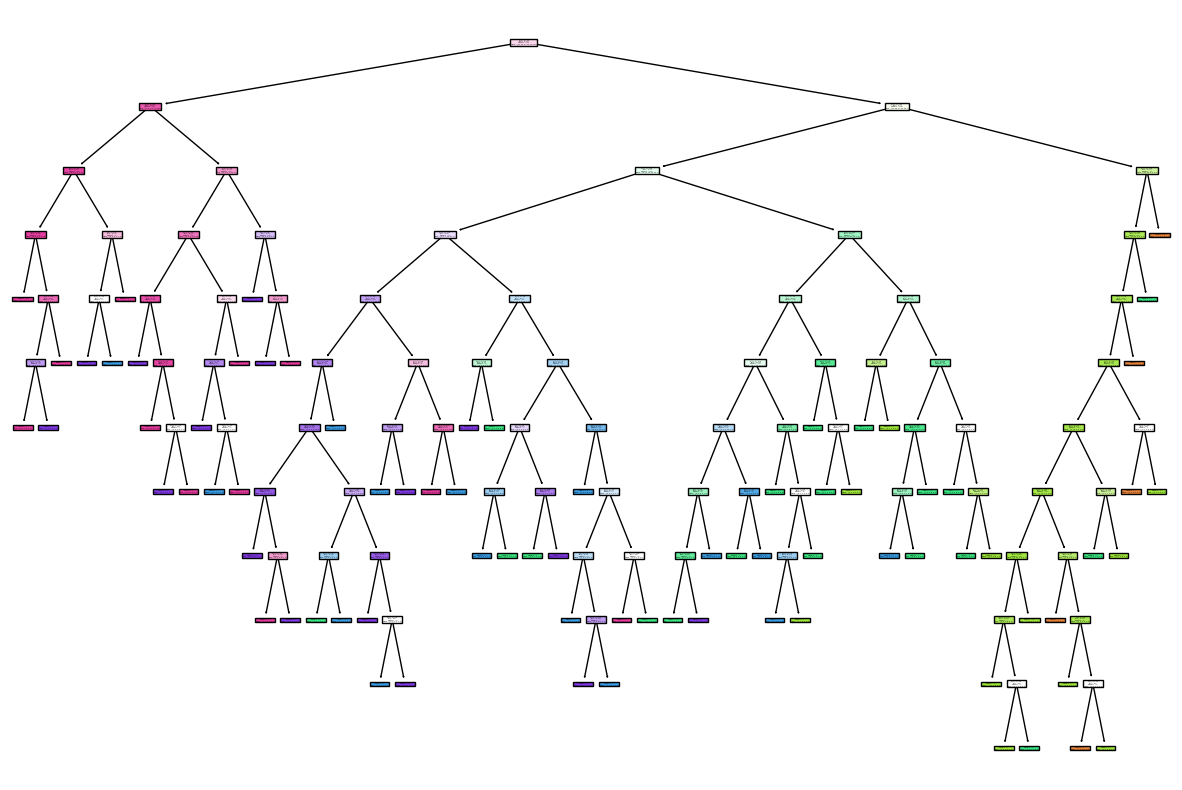

In [13]:
# Lets visualize our tree
plt.figure(figsize=(15,10))
plot_tree(tree, filled=True)
plt.show()

In [43]:
# Now let's make predictions with our tree and get the accuracy
predictions = tree.predict(X_test)
print(f"Tree accuracy: {accuracy_score(y_true = y_test, y_pred = predictions)*100}%")

Tree accuracy: 65.82278481012658%


Our decision tree reported an accuracy of 65.82%. Let's now take a look at the level of importance

## Improving decision tree performance

One of the main problems with decision trees is their greedy approach and their trend to overfit. Since the decision tree will try to find the purest subregions given the training sample, it is possible that this classification is not necessarily generalizable with the new coming data, especially if the tree tries to build as many nodes as necessary to perfectly classify the training data. Establishing limits in the **depth** of the tree and/or the **maximum number of leaf nodes**, can help us build more generalizable trees and therefore improve our classification accuracy. 

For reference, the previous tree was 11 levels depth and generated 77 leaf nodes. In the following cell, we are going to run a loop between 6 (the number of class labels) and 77, building a tree with an n maximum number of leaf nodes for each value, and saving the tree with the best accuracy. 

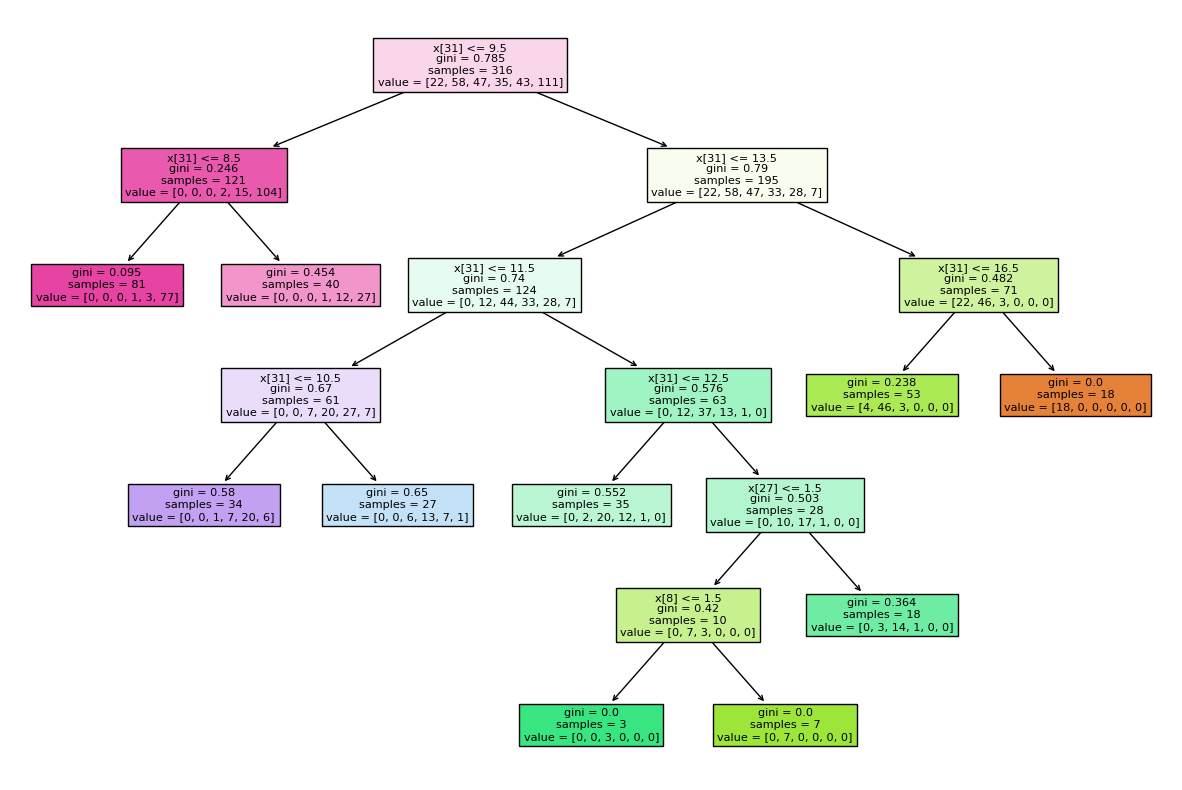

In [42]:
# Create our classifier object and train our tree
best_accuracy = 0
best_tree = None

for n in range(6,78):
    new_tree = DecisionTreeClassifier(max_leaf_nodes=n,random_state=0)
    new_tree.fit(X_train, y_train)
    accuracy = accuracy_score(y_true = y_test, y_pred = new_tree.predict(X_test))
    if accuracy>best_accuracy:
        best_accuracy = accuracy
        best_tree = new_tree
        
plt.figure(figsize=(15,10))
plot_tree(best_tree, filled=True)
plt.show()

In [39]:
# Report the best accuracy and the number of leaves
print(f"Best tree accurady: {best_accuracy}")

Best tree accurady: 0.7974683544303798


As you can see, the new tree performed considerably better than the first one, by keeping the number of leaf nodes at 8 and a depth of 6. You will also notice that not all features were used. In fact, the tree only made use of 3 features, which are the grade of the second period (G2), the alcohol consumption during the weekends (Walc) and the Mother's job (Mjob).

## Random Forest

A more complex solution to prevent overfitting is the use of an ensemble method, which means, the combination of different techniques into one model. Random Forests is a combination of several decisition trees, in order to produce an optimal classifier. For each tree, instead of using the whole collection of features, a subset of features is given to induce randomness and diversity to the model, and avoid overfitting. Once a vast number of trees is trained from different feature subsamples, a classification is made by providing an instance, asking each tree to classify it, and finally assigning the label that is mostly assigned accross the forest.

Through the use of the scikit-learn's [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) class, the implementation of a random forest is pretty simple. Let's run an example. 

In [32]:
# Create our classifier object 
rfc = RandomForestClassifier(random_state=0)
rfc

RandomForestClassifier(random_state=0)

In [33]:
# Fit our rfc with the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
# Now let's make predictions with our rfc and get the accuracy
predictions_rfc = rfc.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions_rfc)

0.7341772151898734

In this particular case, the random forest classifier provided a higher acccuracy than the first decision tree we trained, although smaller than the best tree. As you might have already noticed at this point, the use of more sophisticated techniques is not always a guarantee of an improved performance.

As a final part of our task, we are going to take a look at what features were the most important for classification across our forest. 

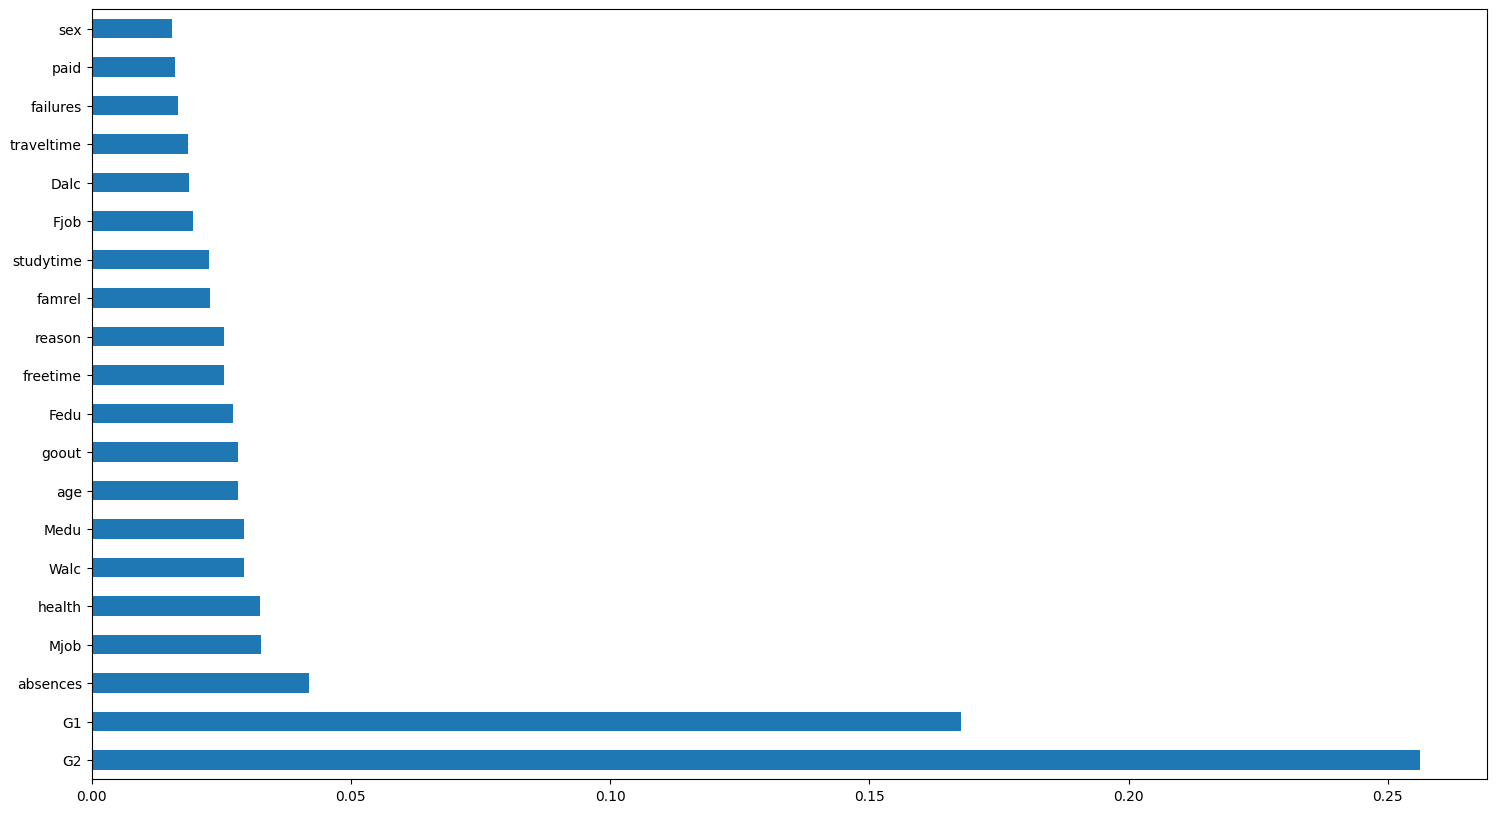

In [44]:
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(18,10));

The 2 grades from previous periods are the most relevant for prediction across the collection of trees. This makes sense as the data source indicated the high correlation between these features and the target. 

## Hands-on